In [38]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np

In [39]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [40]:
image = X_train[0]
image.shape

(32, 32, 3)

Text(0.5, 1.0, 'truck')

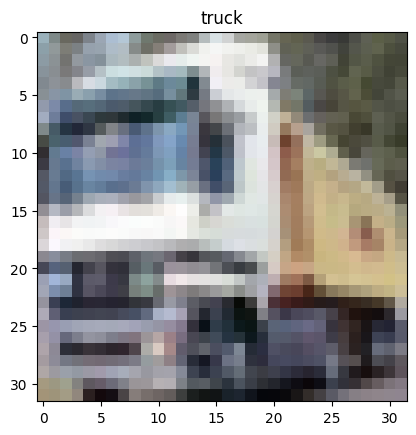

In [41]:
import matplotlib.pyplot as plt
# take first image
image = data_batch_1['data'][1]
# take first image label index
label = data_batch_1['labels'][1]
# Reshape the image
image = image.reshape(3,32,32)
# Transpose the image
image = image.transpose(1,2,0)
# Display the image
plt.imshow(image)
plt.title(label_name[label])

In [42]:
y_train = y_train.reshape(-1,)
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)
# Build the model using the functional API
# input layer
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

# Hidden layer
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))

# last hidden layer i.e.. output layer
model.add(layers.Dense(K, activation='softmax'))


# model description
model.summary()

number of classes: 10
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                

In [43]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


2023-04-03 05:24:39.803026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.3062 - accuracy: 0.5508

2023-04-03 05:25:07.248482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 30s 19ms/step - loss: 1.3062 - accuracy: 0.5508 - val_loss: 0.9784 - val_accuracy: 0.6561
Epoch 2/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8209 - accuracy: 0.7165 - val_loss: 0.7971 - val_accuracy: 0.7303
Epoch 3/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.6714 - accuracy: 0.7678 - val_loss: 0.6876 - val_accuracy: 0.7647
Epoch 4/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.5671 - accuracy: 0.8069 - val_loss: 0.6476 - val_accuracy: 0.7780
Epoch 5/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.4917 - accuracy: 0.8308 - val_loss: 0.6144 - val_accuracy: 0.7996
Epoch 6/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.4093 - accuracy: 0.8589 - val_loss: 0.6028 - val_accuracy: 0.8013
Epoch 7/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.3504 - accuracy: 0.8790 - val_loss: 0.6520 - val_accura